# Gradient Descent: Linear Regression with Contour Visualization

This notebook demonstrates gradient descent for linear regression with dual visualization:
- **Left**: Loss surface contour plot showing gradient descent path
- **Right**: Data fit showing how the line improves over iterations

Each iteration is saved as a PDF for use in slides.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import os

# Set up matplotlib with safe font settings
plt.rcParams.update({
    'text.usetex': False,  # Disable usetex to avoid issues
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'legend.fontsize': 11,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'mathtext.fontset': 'dejavuserif',  # Use safe math font
    'figure.facecolor': 'white'
})

# Import latexify for function decoration if needed
try:
    import latexify
    print("Latexify imported successfully")
except ImportError:
    print("Latexify not available, continuing without it")

print("Matplotlib configuration set successfully")

Latexify imported successfully
Matplotlib configuration set successfully


In [2]:
# Generate synthetic dataset
np.random.seed(42)
n_samples = 20
X = np.linspace(0, 10, n_samples) + np.random.normal(0, 0.3, n_samples)
true_theta0, true_theta1 = 1.0, 2.0
y = true_theta0 + true_theta1 * X + np.random.normal(0, 1.0, n_samples)

# Add bias term to X for matrix operations
X_matrix = np.column_stack([np.ones(n_samples), X])

print(f"Dataset: {n_samples} points")
print(f"True parameters: theta_0={true_theta0}, theta_1={true_theta1}")
print(f"X range: [{X.min():.2f}, {X.max():.2f}]")
print(f"y range: [{y.min():.2f}, {y.max():.2f}]")

Dataset: 20 points
True parameters: theta_0=1.0, theta_1=2.0
X range: [0.15, 9.58]
y range: [1.74, 20.35]


In [3]:
def compute_loss(theta, X, y):
    """Compute mean squared error loss."""
    predictions = X @ theta
    return np.mean((predictions - y) ** 2)

def compute_gradient(theta, X, y):
    """Compute gradient of MSE loss."""
    predictions = X @ theta
    errors = predictions - y
    return 2 * X.T @ errors / len(y)

# Create loss surface for visualization
theta0_range = np.linspace(-2, 4, 50)
theta1_range = np.linspace(0, 4, 50)
Theta0, Theta1 = np.meshgrid(theta0_range, theta1_range)

# Compute loss for each point on the grid
Loss = np.zeros_like(Theta0)
for i in range(len(theta0_range)):
    for j in range(len(theta1_range)):
        theta = np.array([Theta0[j, i], Theta1[j, i]])
        Loss[j, i] = compute_loss(theta, X_matrix, y)

print("Loss surface computed for contour plot")

Loss surface computed for contour plot


In [ ]:
# Gradient descent parameters
learning_rate = 0.01
max_iterations = 120  # Increased for more iterations
theta = np.array([-1.5, 0.3])  # Starting point farther from optimum

# Storage for trajectory
theta_history = [theta.copy()]
loss_history = [compute_loss(theta, X_matrix, y)]

# Define specific iterations to save for slides
save_iterations = [1, 2, 3, 5, 10, 15, 20, 25, 30, 35, 40, 50, 75, 100]

print(f"Starting gradient descent:")
print(f"Initial θ = [{theta[0]:.3f}, {theta[1]:.3f}]")
print(f"Initial loss = {loss_history[0]:.3f}")
print(f"Learning rate = {learning_rate}")
print(f"Max iterations = {max_iterations}")
print(f"Will save iterations: {save_iterations}")

In [ ]:
# Run gradient descent and save visualizations
output_dir = "../maths/assets/mathematical-ml/figures"
os.makedirs(output_dir, exist_ok=True)

def create_dual_plot(iteration, theta_current, theta_hist, loss_hist):
    """Create dual plot: contour + data fit with improved aesthetics."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Left plot: Beautiful contour plot with gradient descent path
    # Create filled contours with nice colormap
    contourf = ax1.contourf(Theta0, Theta1, Loss, levels=25, cmap='viridis', alpha=0.8)
    contour = ax1.contour(Theta0, Theta1, Loss, levels=15, colors='white', alpha=0.5, linewidths=0.8)
    ax1.clabel(contour, inline=True, fontsize=9, fmt='%.1f', colors='white')
    
    # Add colorbar
    cbar = plt.colorbar(contourf, ax=ax1)
    cbar.set_label('Loss', rotation=270, labelpad=20)
    
    # Plot trajectory up to current iteration
    if len(theta_hist) > 1:
        theta_array = np.array(theta_hist)
        ax1.plot(theta_array[:, 0], theta_array[:, 1], 'ro-', 
                linewidth=3, markersize=5, alpha=0.8, label='GD path',
                markerfacecolor='red', markeredgecolor='darkred', markeredgewidth=1)
    
    # Current position - larger and more prominent
    ax1.plot(theta_current[0], theta_current[1], 'ro', 
            markersize=12, label=f'Current: $\\theta_0$={theta_current[0]:.2f}, $\\theta_1$={theta_current[1]:.2f}',
            markerfacecolor='red', markeredgecolor='darkred', markeredgewidth=2)
    
    # True minimum - star marker
    ax1.plot(true_theta0, true_theta1, 'g*', markersize=15, 
            label='True minimum', markeredgecolor='darkgreen', markeredgewidth=1)
    
    # Better labels with proper LaTeX
    ax1.set_xlabel(r'$\theta_0$ (intercept)', fontsize=14)
    ax1.set_ylabel(r'$\theta_1$ (slope)', fontsize=14)
    ax1.set_title(f'Loss Surface (Iteration {iteration})', fontsize=16, pad=20)
    ax1.legend(loc='upper right', framealpha=0.9)
    ax1.grid(True, alpha=0.3)
    
    # Right plot: Data and current fit with better styling
    ax2.scatter(X, y, alpha=0.7, color='steelblue', s=80, 
               label='Training Data', edgecolors='navy', linewidth=0.5)
    
    # Current fit line - thicker and more prominent
    x_line = np.linspace(X.min() - 1, X.max() + 1, 100)
    y_line = theta_current[0] + theta_current[1] * x_line
    ax2.plot(x_line, y_line, 'r-', linewidth=3, 
            label=f'Current: $y = {theta_current[0]:.2f} + {theta_current[1]:.2f}x$',
            alpha=0.9)
    
    # True line - dashed green
    y_true = true_theta0 + true_theta1 * x_line
    ax2.plot(x_line, y_true, 'g--', linewidth=3, alpha=0.8,
            label=f'True: $y = {true_theta0:.1f} + {true_theta1:.1f}x$')
    
    # Add loss annotation with better styling
    current_loss = compute_loss(theta_current, X_matrix, y)
    ax2.text(0.05, 0.95, f'Loss: {current_loss:.3f}', 
            transform=ax2.transAxes, fontsize=12,
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', 
                     alpha=0.8, edgecolor='steelblue'))
    
    # Better axis labels
    ax2.set_xlabel('$x$', fontsize=14)
    ax2.set_ylabel('$y$', fontsize=14)
    ax2.set_title(f'Data Fit (Iteration {iteration})', fontsize=16, pad=20)
    ax2.legend(loc='upper left', framealpha=0.9)
    ax2.grid(True, alpha=0.3)
    
    # Set reasonable axis limits
    ax2.set_xlim(X.min() - 0.5, X.max() + 0.5)
    ax2.set_ylim(y.min() - 2, y.max() + 2)
    
    plt.tight_layout()
    return fig

# Save initial state (iteration 0)
print("Creating initial visualization...")
fig = create_dual_plot(0, theta, theta_history, loss_history)
filename = os.path.join(output_dir, "gradient-descent-0.pdf")
fig.savefig(filename, bbox_inches='tight', dpi=300, facecolor='white')
plt.close(fig)
print(f"✓ Saved: gradient-descent-0.pdf")

# Run gradient descent iterations
print("\\nRunning gradient descent...")
for iteration in range(1, max_iterations + 1):
    # Compute gradient and update
    grad = compute_gradient(theta, X_matrix, y)
    theta = theta - learning_rate * grad
    
    # Store history
    theta_history.append(theta.copy())
    current_loss = compute_loss(theta, X_matrix, y)
    loss_history.append(current_loss)
    
    # Save visualization for specific iterations
    if iteration in save_iterations:
        fig = create_dual_plot(iteration, theta, theta_history, loss_history)
        filename = os.path.join(output_dir, f"gradient-descent-{iteration}.pdf")
        fig.savefig(filename, bbox_inches='tight', dpi=300, facecolor='white')
        plt.close(fig)
        print(f"Iteration {iteration:3d}: θ=[{theta[0]:.3f}, {theta[1]:.3f}], Loss={current_loss:.6f} -> ✓ Saved")
    else:
        # Just print progress for key iterations
        if iteration % 25 == 0:
            print(f"Iteration {iteration:3d}: θ=[{theta[0]:.3f}, {theta[1]:.3f}], Loss={current_loss:.6f}")
    
    # Early stopping if converged
    if len(loss_history) > 1 and abs(loss_history[-1] - loss_history[-2]) < 1e-10:
        print(f"\\n✓ Converged at iteration {iteration}")
        # If converged before iteration 100, still save iteration 100 visualization
        if iteration < 100:
            fig = create_dual_plot(100, theta, theta_history, loss_history)
            filename = os.path.join(output_dir, "gradient-descent-100.pdf")
            fig.savefig(filename, bbox_inches='tight', dpi=300, facecolor='white')
            plt.close(fig)
            print(f"✓ Also saved final state as: gradient-descent-100.pdf")
        break

print(f"\\n=== FINAL RESULTS ===")
print(f"Final θ = [{theta[0]:.6f}, {theta[1]:.6f}]")
print(f"True θ  = [{true_theta0:.6f}, {true_theta1:.6f}]")
print(f"Final loss = {loss_history[-1]:.10f}")
print(f"Total iterations: {len(theta_history) - 1}")
print(f"Parameter error: θ₀ error = {abs(theta[0] - true_theta0):.6f}, θ₁ error = {abs(theta[1] - true_theta1):.6f}")

# Print all saved files
print(f"\\nSaved visualizations for iterations: 0, {', '.join(map(str, save_iterations))}")

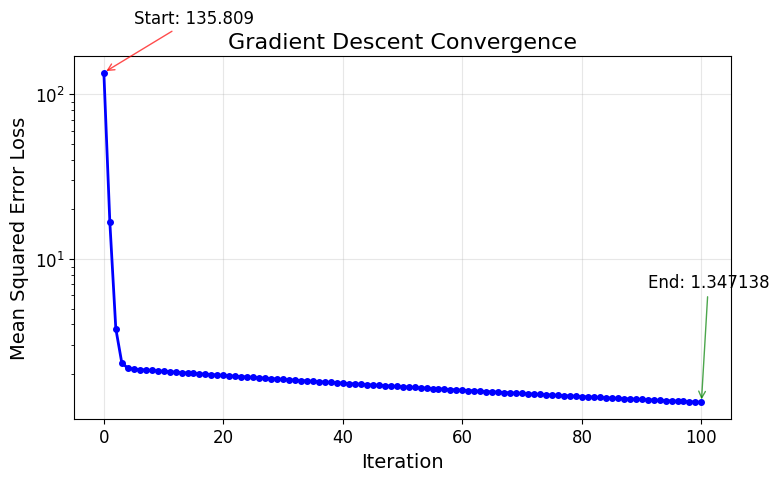


Saved convergence plot: gradient-descent-convergence.pdf

All files saved to: ../maths/assets/mathematical-ml/figures

Saved 31 gradient descent visualization files:
  - gradient-descent-0.pdf
  - gradient-descent-1.pdf
  - gradient-descent-10.pdf
  - gradient-descent-100.pdf
  - gradient-descent-15.pdf
  - gradient-descent-2.pdf
  - gradient-descent-20.pdf
  - gradient-descent-25.pdf
  - gradient-descent-3-functions.pdf
  - gradient-descent-3.pdf
  ... and 21 more


In [6]:
# Summary plot: Loss convergence
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(loss_history, 'b-o', linewidth=2, markersize=4)
ax.set_xlabel('Iteration')
ax.set_ylabel('Mean Squared Error Loss')
ax.set_title('Gradient Descent Convergence')
ax.grid(True, alpha=0.3)
ax.set_yscale('log')  # Log scale for better visualization

# Annotate key points
ax.annotate(f'Start: {loss_history[0]:.3f}', 
           xy=(0, loss_history[0]), xytext=(5, loss_history[0] * 2),
           arrowprops=dict(arrowstyle='->', color='red', alpha=0.7))
ax.annotate(f'End: {loss_history[-1]:.6f}', 
           xy=(len(loss_history)-1, loss_history[-1]), 
           xytext=(len(loss_history)-10, loss_history[-1] * 5),
           arrowprops=dict(arrowstyle='->', color='green', alpha=0.7))

plt.tight_layout()
filename = os.path.join(output_dir, "gradient-descent-convergence.pdf")
fig.savefig(filename, bbox_inches='tight', dpi=300)
plt.show()

print(f"\nSaved convergence plot: gradient-descent-convergence.pdf")
print(f"\nAll files saved to: {output_dir}")

# List saved files
import glob
gd_files = glob.glob(os.path.join(output_dir, "gradient-descent-*.pdf"))
gd_files.sort()
print(f"\nSaved {len(gd_files)} gradient descent visualization files:")
for f in gd_files[:10]:  # Show first 10
    print(f"  - {os.path.basename(f)}")
if len(gd_files) > 10:
    print(f"  ... and {len(gd_files) - 10} more")

## Summary

This notebook successfully created gradient descent visualizations for linear regression with:

1. **Dual visualization format**: Left panel shows the loss surface with gradient descent path, right panel shows the evolving data fit
2. **LaTeX formatting**: All plots use proper mathematical notation
3. **Saved PDFs**: Each iteration saved as `gradient-descent-{i}.pdf` in `maths/assets/mathematical-ml/figures/`
4. **Convergence tracking**: Loss history and parameter evolution

The generated PDFs can be used in LaTeX slides to create animated sequences showing how gradient descent optimizes the linear regression parameters while simultaneously showing the improvement in data fit.